In [151]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import regex as re 
import seaborn as sns

In [2]:
pd.set_option("display.max_colwidth", None)

# 1. Load data

In [3]:
ROOT_DATA_PATH = "/Users/lggvu/Projects/HUST/Data-Science-Project/data/tabular/integrate/lda"
VIS_PATH = "/Users/lggvu/Projects/HUST/Data-Science-Project/ds-epl-matches/notebooks/images/03.4_eda_on_integrated_data"
os.chdir(ROOT_DATA_PATH)

df_matches = pd.read_csv("matches.csv")
df_id = pd.read_csv("matches_with_playerid.csv")
df_players = pd.read_csv("players.csv")

In [4]:
df_matches 

,home_result,season,0_0,1_0,2_0,0_1,1_1,2_1,0_2,1_2,...,2_23,0_24,1_24,2_24,0_25,1_25,2_25,0_26,1_26,2_26
0,lose,2019/20,1.286584,7.035507,1.259102,-2.931753,0.062317,-1.631287,-2.707726,-0.607117,...,-100.000000,2.247774,-0.737455,-1.588368,2.059278,-1.289581,-0.214014,-0.025312,-0.479952,1.471758
1,win,2019/20,0.771112,2.864098,0.136227,-3.137167,-0.522932,-0.568367,-2.725580,-0.359102,...,-0.780148,1.990417,-0.727778,-2.796785,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
2,win,2019/20,1.081934,6.476357,1.060024,-3.610155,-0.617447,3.083772,-3.131397,-0.594232,...,2.718124,2.234902,-0.764160,-0.524770,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
3,win,2019/20,1.270547,6.125389,0.866984,-3.375562,-0.538387,-1.682440,-3.103326,0.157253,...,-100.000000,1.980681,-0.619516,-1.541976,1.383543,-0.932270,0.070167,1.083550,-0.641444,1.485667
4,win,2019/20,1.446074,7.081245,1.423544,-3.169787,-0.700700,0.751141,-2.441979,-0.588787,...,0.878456,2.518209,-0.529214,-3.471708,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,win,2021/22,1.096860,7.664981,1.030113,-3.110702,-0.419559,0.173017,-2.291735,-0.189176,...,-1.604356,2.068204,-0.881599,-1.226240,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
1136,win,2021/22,0.334105,3.979458,0.309591,-3.123301,-0.053396,-0.840144,-2.975121,-0.110232,...,-0.690187,2.041043,-1.006175,-3.622045,1.180349,-0.571187,-1.254287,-100.000000,-100.000000,-100.000000
1137,lose,2021/22,0.935548,6.279345,0.752885,-2.725118,-0.222117,-0.084760,-2.359624,-0.233390,...,-100.000000,2.089158,-0.930276,-3.477027,1.293585,-1.183664,2.243419,1.281312,-0.590887,0.282728
1138,win,2021/22,1.182444,7.042481,0.819191,-2.873911,-0.669088,0.491676,-2.763736,-0.132193,...,0.762411,1.627330,-1.141200,-1.083433,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [5]:
df_id

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,2_24,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26
0,37096.0,219924.0,81012.0,55459.0,166640.0,-1.0,204480.0,101537.0,57531.0,86934.0,...,-1.588368,205651,2.059278,-1.289581,-0.214014,103955,-0.025312,-0.479952,1.471758,103025
1,37915.0,55605.0,173904.0,158534.0,38290.0,-1.0,62974.0,231372.0,157668.0,45268.0,...,-2.796785,213345,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
2,116535.0,169187.0,122798.0,97032.0,171287.0,-1.0,56979.0,116643.0,41733.0,-1.0,...,-0.524770,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
3,98747.0,17761.0,51927.0,68983.0,39487.0,-1.0,433154.0,60551.0,40145.0,60586.0,...,-1.541976,200439,1.383543,-0.932270,0.070167,84939,1.083550,-0.641444,1.485667,83283
4,51940.0,214590.0,95658.0,184667.0,106760.0,-1.0,109322.0,156689.0,176297.0,195851.0,...,-3.471708,173879,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,37096.0,55459.0,164555.0,60232.0,219924.0,-1.0,180151.0,86934.0,178186.0,204480.0,...,-1.226240,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
1136,40383.0,171771.0,450527.0,212721.0,-1.0,-1.0,203389.0,240143.0,78056.0,244560.0,...,-3.622045,144485,1.180349,-0.571187,-1.254287,446008,-100.000000,-100.000000,-100.000000,-1
1137,51940.0,214590.0,90152.0,106760.0,76359.0,-1.0,195851.0,62398.0,209243.0,220688.0,...,-3.477027,102057,1.293585,-1.183664,2.243419,200600,1.281312,-0.590887,0.282728,222564
1138,116535.0,60914.0,122798.0,97032.0,169187.0,-1.0,206915.0,61558.0,116643.0,-1.0,...,-1.083433,200617,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1


# 2. EDA

### Season 2019/2020

In [6]:
df_1920 = df_id[df_id['season']=='2019/20']
df_1920

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,2_24,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26
0,37096.0,219924.0,81012.0,55459.0,166640.0,-1.0,204480.0,101537.0,57531.0,86934.0,...,-1.588368,205651,2.059278,-1.289581,-0.214014,103955,-0.025312,-0.479952,1.471758,103025
1,37915.0,55605.0,173904.0,158534.0,38290.0,-1.0,62974.0,231372.0,157668.0,45268.0,...,-2.796785,213345,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
2,116535.0,169187.0,122798.0,97032.0,171287.0,-1.0,56979.0,116643.0,41733.0,-1.0,...,-0.524770,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
3,98747.0,17761.0,51927.0,68983.0,39487.0,-1.0,433154.0,60551.0,40145.0,60586.0,...,-1.541976,200439,1.383543,-0.932270,0.070167,84939,1.083550,-0.641444,1.485667,83283
4,51940.0,214590.0,95658.0,184667.0,106760.0,-1.0,109322.0,156689.0,176297.0,195851.0,...,-3.471708,173879,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,121160.0,121145.0,58621.0,146941.0,432656.0,-1.0,220566.0,61366.0,20664.0,-1.0,...,-0.524770,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
376,67089.0,57145.0,109528.0,38290.0,-1.0,-1.0,56983.0,50232.0,179018.0,116543.0,...,-0.611942,152760,1.174299,-1.113883,1.427079,81880,-0.078340,-2.250698,1.454779,157882
377,58376.0,88900.0,93100.0,40146.0,158534.0,-1.0,91047.0,78056.0,83283.0,101178.0,...,-2.305858,18867,1.435788,-0.799341,-1.009852,169432,-100.000000,-100.000000,-100.000000,-1
378,37096.0,219924.0,40669.0,81012.0,222018.0,-1.0,204480.0,217593.0,18073.0,215439.0,...,-1.869336,217487,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1


In [7]:
# get the id of all players played in the season
df_1920_ids = df_1920.loc[:,['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26']]
ids = list()
ids_unique = list()
for col in df_1920_ids:
    ids_unique.append(df_1920_ids[col].unique())
    ids.append(df_1920_ids[col])
ids_unique = [i for sub in ids_unique for i in sub if i!= -1]
ids = [i for sub in ids for i in sub if i!=-1]
ids_unique = list(set(ids_unique))
print("Total number of players showed up in the season: ", len(ids_unique))

Total number of players showed up in the season:  470


Mean frequency:  17.74468085106383
Max matches played by a player:  38
Min matches played by a player:  1


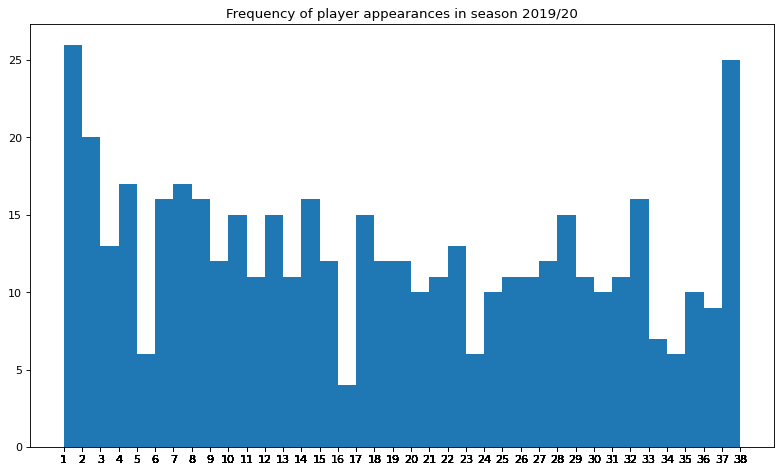

<Figure size 432x288 with 0 Axes>

In [8]:
# get frequency of players occurances
tup = list(Counter(ids).items())
appear_1920 = dict(tup) # dict of number of appearances of players in the 19/20 season
ind = [i[0] for i in tup]
freq = np.array([i[1] for i in tup])
print("Mean frequency: ", freq.mean())
print("Max matches played by a player: ", freq.max())
print("Min matches played by a player: ", freq.min())

plt.figure(figsize=(12, 7), dpi=80)
plt.hist(freq, bins=np.arange(freq.min(), freq.max()+1))
plt.xticks(freq)
plt.title("Frequency of player appearances in season 2019/20")
plt.show()
plt.savefig(os.path.join(VIS_PATH, "freq_appeances_1920"))

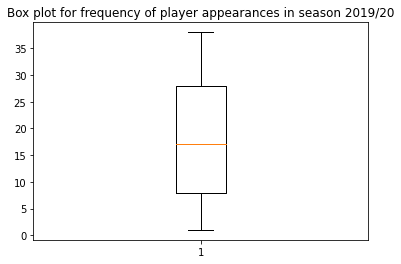

In [9]:
plt.boxplot(freq)
plt.title("Box plot for frequency of player appearances in season 2019/20")
plt.savefig(os.path.join(VIS_PATH, "freq_appearances_1920_boxplot.png"))

**NOTE:** The *2019/20* season have `470` different players, where a player can appear in upto 38 matches and at least 0 match. For this dataset, we only consider player that appear at least one time.

Statiscally (proved in the Report), a player must appear in at least `18 matches` to have a statistically significant comparison at an 80% confidence level with an error margin of 5%.
Therefore, to find the player with highest win/lose/draw ratio, we only consider players with over 18 appearances in the *2019/20* season.

### Season 2019/2020

In [10]:
df_2021 = df_id[df_id['season']=='2020/21']
df_2021

# get the id of all players played in the season
df_2021_ids = df_2021.loc[:,['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26']]
ids = list()
ids_unique = list()
for col in df_2021_ids:
    ids_unique.append(df_2021_ids[col].unique())
    ids.append(df_2021_ids[col])
ids_unique = [i for sub in ids_unique for i in sub if i!= -1]
ids = [i for sub in ids for i in sub if i!=-1]
ids_unique = list(set(ids_unique))
print("Total number of players showed up in the season: ", len(ids_unique))

Total number of players showed up in the season:  472


Mean frequency:  17.658898305084747
Max matches played by a player:  38
Min matches played by a player:  1


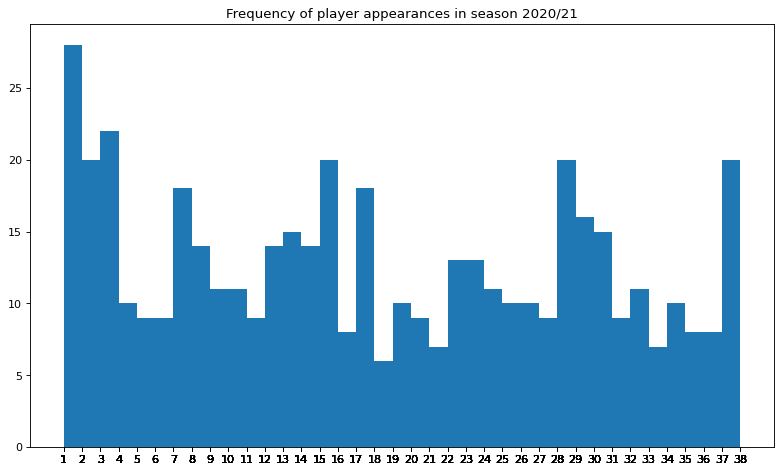

<Figure size 432x288 with 0 Axes>

In [11]:
# get frequency of players occurances
tup = list(Counter(ids).items())
appear_2021 = dict(tup) # dict of number of appearances of players in the 20/21 season

ind = [i[0] for i in tup]
freq = np.array([i[1] for i in tup])
print("Mean frequency: ", freq.mean())
print("Max matches played by a player: ", freq.max())
print("Min matches played by a player: ", freq.min())

plt.figure(figsize=(12, 7), dpi=80)
plt.hist(freq, bins=np.arange(freq.min(), freq.max()+1))
plt.xticks(freq)

plt.title("Frequency of player appearances in season 2020/21")
plt.show()
plt.savefig(os.path.join(VIS_PATH, "freq_appeances_2021.png"))

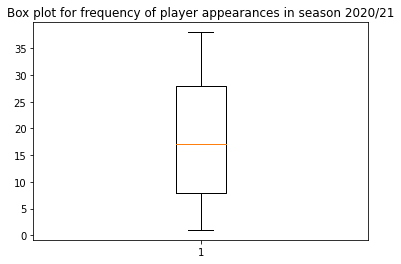

In [12]:
plt.boxplot(freq)
plt.title("Box plot for frequency of player appearances in season 2020/21")
plt.savefig(os.path.join(VIS_PATH, "freq_appearances_2021_boxplot.png"))

**NOTE:** The *2020/21* season have `472` different players, where a player can appear in upto 38 matches and at least 0 match. For this dataset, we only consider player that appear at least one time.

Statiscally (proved in the Report), a player must appear in at least `19 matches` to have a statistically significant comparison at an 80% confidence level with an error margin of 5%.
Therefore, to find the player with highest win/lose/draw ratio, we only consider players with over 19 appearances in the *2020/21* season.

### Season 2021/22

In [13]:
df_2122 = df_id[df_id['season']=='2021/22']
df_2122

# get the id of all players played in the season
df_2122_ids = df_2122.loc[:,['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26']]
ids = list()
ids_unique = list()
for col in df_2122_ids:
    ids_unique.append(df_2122_ids[col].unique())
    ids.append(df_2122_ids[col])
ids_unique = [i for sub in ids_unique for i in sub if i!= -1]
ids = [i for sub in ids for i in sub if i!=-1]
ids_unique = list(set(ids_unique))
print("Total number of players showed up in the season: ", len(ids_unique))

Total number of players showed up in the season:  484


Mean frequency:  17.233471074380166
Max matches played by a player:  38
Min matches played by a player:  1


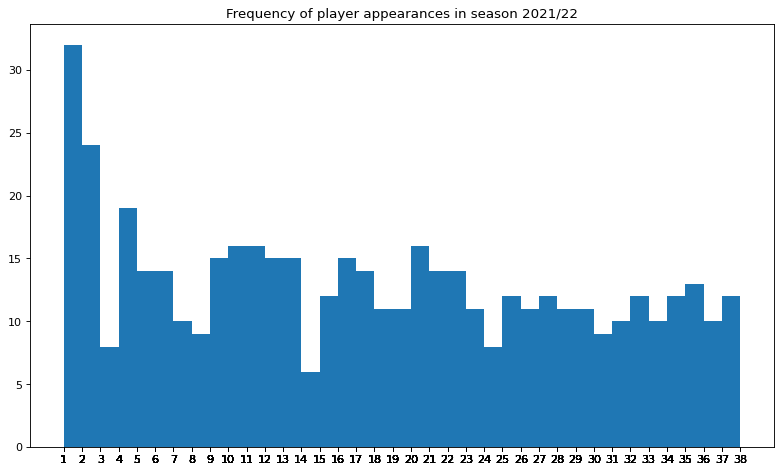

<Figure size 432x288 with 0 Axes>

In [14]:
# get frequency of players occurances
tup = list(Counter(ids).items())
appear_2122 = dict(tup) # dict of number of appearances of players in the 21/22 season

ind = [i[0] for i in tup]
freq = np.array([i[1] for i in tup])
print("Mean frequency: ", freq.mean())
print("Max matches played by a player: ", freq.max())
print("Min matches played by a player: ", freq.min())

plt.figure(figsize=(12, 7), dpi=80)
plt.hist(freq, bins=np.arange(freq.min(), freq.max()+1))
plt.xticks(freq)

plt.title("Frequency of player appearances in season 2021/22")
plt.show()
plt.savefig(os.path.join(VIS_PATH, "freq_appeances_2122.png"))

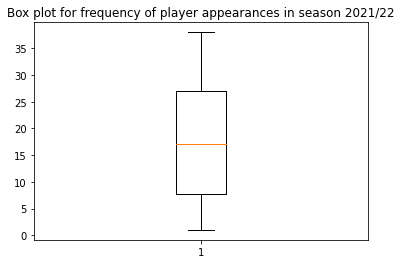

In [15]:
plt.boxplot(freq)
plt.title("Box plot for frequency of player appearances in season 2021/22")
plt.savefig(os.path.join(VIS_PATH, "freq_appearances_2122_boxplot.png"))

**NOTE:** The *2021/22* season have `484` different players, where a player can appear in upto 38 matches and at least 0 match. For this dataset, we only consider player that appear at least one time.

Statiscally (proved in the Report), a player must appear in at least `19 matches` to have a statistically significant comparison at an 80% confidence level with an error margin of 5%.
Therefore, to find the player with highest win/lose/draw ratio, we only consider players with over 19 appearances in the *2021/22* season.

### Players that has highest **home** win/lose/draw ratio 

#### Season 2019/20

In [16]:
df_1920

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,2_24,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26
0,37096.0,219924.0,81012.0,55459.0,166640.0,-1.0,204480.0,101537.0,57531.0,86934.0,...,-1.588368,205651,2.059278,-1.289581,-0.214014,103955,-0.025312,-0.479952,1.471758,103025
1,37915.0,55605.0,173904.0,158534.0,38290.0,-1.0,62974.0,231372.0,157668.0,45268.0,...,-2.796785,213345,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
2,116535.0,169187.0,122798.0,97032.0,171287.0,-1.0,56979.0,116643.0,41733.0,-1.0,...,-0.524770,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
3,98747.0,17761.0,51927.0,68983.0,39487.0,-1.0,433154.0,60551.0,40145.0,60586.0,...,-1.541976,200439,1.383543,-0.932270,0.070167,84939,1.083550,-0.641444,1.485667,83283
4,51940.0,214590.0,95658.0,184667.0,106760.0,-1.0,109322.0,156689.0,176297.0,195851.0,...,-3.471708,173879,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,121160.0,121145.0,58621.0,146941.0,432656.0,-1.0,220566.0,61366.0,20664.0,-1.0,...,-0.524770,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
376,67089.0,57145.0,109528.0,38290.0,-1.0,-1.0,56983.0,50232.0,179018.0,116543.0,...,-0.611942,152760,1.174299,-1.113883,1.427079,81880,-0.078340,-2.250698,1.454779,157882
377,58376.0,88900.0,93100.0,40146.0,158534.0,-1.0,91047.0,78056.0,83283.0,101178.0,...,-2.305858,18867,1.435788,-0.799341,-1.009852,169432,-100.000000,-100.000000,-100.000000,-1
378,37096.0,219924.0,40669.0,81012.0,222018.0,-1.0,204480.0,217593.0,18073.0,215439.0,...,-1.869336,217487,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1


In [17]:
df_1920_eda = df_1920.groupby('home_result')['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'].apply(lambda x:x.value_counts().index[0]).reset_index()
df_1920_eda

/var/folders/pr/blnkzjbd0gsc2w67v8dbtyqc0000gn/T/ipykernel_86675/3894934045.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1920_eda = df_1920.groupby('home_result')['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'].apply(lambda x:x.value_counts().index[0]).reset_index()


,home_result,0
0,draw,"(9089, 41338, 40868, 52940, 41945, 85624, 43250, 121599, 61566, -1, -1, 73426, 50175, -1, 172649, 40386, 108416, 146610, -1, 153723, 47247, 79934, 82691, 63426, 171975, 169432, -1)"
1,lose,"(8432, 108156, 199798, 123354, -1, -1, 230046, 169359, 203368, 61603, -1, 114283, 193488, 217487, 37915, 80226, 55605, 173904, 115556, 95715, 157668, 108823, 194252, 93264, 85971, -1, -1)"
2,win,"(8432, 149484, 169359, 199798, 37339, -1, 85242, 122806, 230046, -1, -1, 114283, 148508, 217487, 98980, 41270, 156074, 111457, -1, 198849, 223340, 182539, 58822, -1, 59966, 205533, 54694)"


In [18]:
draw_id = list(df_1920_eda.iloc[0,1])
lose_id = list(df_1920_eda.iloc[1, 1])
win_id = list(df_1920_eda.iloc[2,1])

In [19]:
draw_id = [i for i in draw_id if i != -1]
lose_id = [i for i in lose_id if i != -1]
win_id = [i for i in win_id if i != -1]


draw_id = [i for i in draw_id if appear_1920[i] > 18]
lose_id = [i for i in lose_id if appear_1920[i] > 18]
win_id = [i for i in win_id if appear_1920[i] > 18]


In [20]:
from collections import Counter

def sort_by_freq(lst):
    return [item for items, c in Counter(lst).most_common()
                                      for item in [items] * c]
print('Sort by home draws: ', sort_by_freq(draw_id))
print('Sort by home losses: ', sort_by_freq(lose_id))
print('Sort by home wins: ', sort_by_freq(win_id))

Sort by home draws:  [9089, 41338, 85624, 121599, 172649, 40386, 108416, 146610, 153723, 47247, 79934, 82691, 63426, 169432]
Sort by home losses:  [199798, 230046, 169359, 203368, 114283, 193488, 37915, 80226, 55605, 173904, 95715, 157668, 108823, 85971]
Sort by home wins:  [149484, 169359, 199798, 122806, 230046, 114283, 148508, 41270, 111457, 223340, 58822, 59966, 54694]


In [21]:
# calculate win/lose/type percent
def calculate_percentage(player_id, df_season, result):
    total_home_matches = df_season[(df_season['id_0']==player_id) |
    (df_season['id_1']==player_id) | 
    (df_season['id_2']==player_id) |
    (df_season['id_3']==player_id) |
    (df_season['id_4']==player_id) |
    (df_season['id_5']==player_id) |
    (df_season['id_6']==player_id) |
    (df_season['id_7']==player_id) |
    (df_season['id_8']==player_id) |
    (df_season['id_9']==player_id) |
    (df_season['id_10']==player_id) |
    (df_season['id_11']==player_id) |
    (df_season['id_12']==player_id) |
    (df_season['id_13']==player_id) |
    (df_season['id_14']==player_id) |
    (df_season['id_15']==player_id) |
    (df_season['id_16']==player_id) |
    (df_season['id_17']==player_id) |
    (df_season['id_18']==player_id) |
    (df_season['id_19']==player_id) |
    (df_season['id_20']==player_id) |
    (df_season['id_21']==player_id) |
    (df_season['id_22']==player_id) |
    (df_season['id_23']==player_id) |
    (df_season['id_24']==player_id) |
    (df_season['id_25']==player_id) |
    (df_season['id_26']==player_id)].shape[0] 

    total_matches_with_result =  df_season[(df_season['home_result'] == str(result)) &
    (df_season['id_0']==player_id) |
    (df_season['id_1']==player_id) | 
    (df_season['id_2']==player_id) |
    (df_season['id_3']==player_id) |
    (df_season['id_4']==player_id) |
    (df_season['id_5']==player_id) |
    (df_season['id_6']==player_id) |
    (df_season['id_7']==player_id) |
    (df_season['id_8']==player_id) |
    (df_season['id_9']==player_id) |
    (df_season['id_10']==player_id) |
    (df_season['id_11']==player_id) |
    (df_season['id_12']==player_id) |
    (df_season['id_13']==player_id) |
    (df_season['id_14']==player_id) |
    (df_season['id_15']==player_id) |
    (df_season['id_16']==player_id) |
    (df_season['id_17']==player_id) |
    (df_season['id_18']==player_id) |
    (df_season['id_19']==player_id) |
    (df_season['id_20']==player_id) |
    (df_season['id_21']==player_id) |
    (df_season['id_22']==player_id) |
    (df_season['id_23']==player_id) |
    (df_season['id_24']==player_id) |
    (df_season['id_25']==player_id) |
    (df_season['id_26']==player_id)].shape[0]
    
    return total_matches_with_result/total_home_matches

In [22]:
# reference back to the player_id
print("Player that has highest draw ratio in 2019/20 season: ",
    df_players['name'][(df_players['id']==sort_by_freq(draw_id)[0]) & (df_players['season']=='2019/20')])
print('Percentage: ', calculate_percentage(sort_by_freq(draw_id)[0], df_1920, 'draw'))
print(' ')

print("Player that has highest loss ratio in 2019/20 season: " +
    df_players['name'][(df_players['id']==sort_by_freq(lose_id)[0]) & (df_players['season']=='2019/20')])
print('Percentage: ', calculate_percentage(sort_by_freq(lose_id)[0], df_1920, 'lose'))
print('')

print("Player that has highest win ratio in 2019/20 season: " +
    df_players['name'][(df_players['id']==sort_by_freq(win_id)[0]) & (df_players['season']=='2019/20')])
print('Percentage: ', calculate_percentage(sort_by_freq(win_id)[0], df_1920, 'win'))

Player that has highest draw ratio in 2019/20 season:  2120    Ben Foster
Name: name, dtype: object
Percentage:  0.6578947368421053
 
643    Player that has highest loss ratio in 2019/20 season: Ezri Konsa
Name: name, dtype: object
Percentage:  1.0

3188    Player that has highest win ratio in 2019/20 season: Tyrone Mings
Name: name, dtype: object
Percentage:  1.0


**NOTE:** In the season 2019/20: Kasper Scheimel has the highest home draw, loss and win ratio of 60%, 60%, and 79% respectively.

#### Season 2020/21

In [23]:
df_2021

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,2_24,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26
380,98980.0,169359.0,199798.0,149484.0,123354.0,-1.0,184704.0,110504.0,122806.0,114283.0,...,-2.070780,165153,1.179323,-0.947588,1.507867,176413,1.067499,-1.188325,2.981389,184341
381,80201.0,156074.0,192895.0,226597.0,101184.0,-1.0,209289.0,195735.0,84450.0,167199.0,...,0.458008,165210,1.077781,-1.083862,1.644572,116216,0.980173,-0.707012,0.635013,243016
382,39790.0,66588.0,55914.0,38588.0,-1.0,-1.0,219961.0,155405.0,105377.0,87873.0,...,-0.974710,171975,0.840762,-1.022975,-0.181475,50229,-100.000000,-100.000000,-100.000000,-1
383,155529.0,109646.0,82514.0,167074.0,-1.0,-1.0,168765.0,96994.0,203325.0,101105.0,...,0.690123,170137,1.093087,-0.808486,1.768346,179018,-100.000000,-100.000000,-100.000000,-1
384,116535.0,122798.0,169187.0,197464.0,219937.0,-1.0,61558.0,41733.0,116643.0,-1.0,...,-1.570823,82403,1.086811,-0.985004,-0.295157,80146,0.604419,-0.846282,2.156062,60252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,51940.0,214590.0,106760.0,95658.0,184667.0,-1.0,141746.0,195851.0,176297.0,220688.0,...,-1.524229,84939,1.766344,-0.860012,-1.529609,200439,-100.000000,-100.000000,-100.000000,-1
756,59735.0,194799.0,57145.0,101148.0,111773.0,-1.0,153127.0,180974.0,50232.0,83314.0,...,0.021863,176297,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
757,51940.0,214590.0,106760.0,95658.0,184667.0,-1.0,200617.0,141746.0,195851.0,176297.0,...,-3.472083,106617,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
758,121160.0,97299.0,171314.0,58621.0,206325.0,-1.0,61366.0,209244.0,27789.0,-1.0,...,-3.715398,177815,1.617084,-0.980313,-1.802433,212319,-100.000000,-100.000000,-100.000000,-1


In [24]:
df_2021_eda = df_2021.groupby('home_result')['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'].apply(lambda x:x.value_counts().index[0]).reset_index()
df_2021_eda

/var/folders/pr/blnkzjbd0gsc2w67v8dbtyqc0000gn/T/ipykernel_86675/3235936833.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2021_eda = df_2021.groupby('home_result')['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'].apply(lambda x:x.value_counts().index[0]).reset_index()


,home_result,0
0,draw,"(17745, 166477, 220627, 444463, 37642, -1, 51938, 172780, 166989, 201666, 203341, 101668, -1, -1, 51940, 106760, 95658, 197365, 184667, 200617, 141746, 195851, 176297, 101582, 148225, -1, -1)"
1,lose,"(17745, 166477, 218031, 37642, 244619, -1, 166989, 201666, 203341, 111931, -1, 173515, 101668, -1, 80201, 192895, 92371, 41270, 58822, 209289, 195735, 153256, 84450, 47431, 59966, -1, -1)"
2,win,"(17745, 166477, 218031, 220627, 203341, -1, 86881, 106837, 166989, 201666, 168580, 101668, -1, -1, 98747, 103914, 218023, 41674, 17997, 60551, 172782, 90517, 433154, -1, 60689, 44683, -1)"


In [25]:
draw_id = list(df_2021_eda.iloc[0,1])
lose_id = list(df_2021_eda.iloc[1, 1])
win_id = list(df_2021_eda.iloc[2,1])

In [26]:
draw_id = [i for i in draw_id if i != -1]
lose_id = [i for i in lose_id if i != -1]
win_id = [i for i in win_id if i != -1]


draw_id = [i for i in draw_id if appear_2021[i] > 19]
lose_id = [i for i in lose_id if appear_2021[i] > 19]
win_id = [i for i in win_id if appear_2021[i] > 19]


In [27]:
print('Sort by home draws: ', sort_by_freq(draw_id))
print('Sort by home losses: ', sort_by_freq(lose_id))
print('Sort by home wins: ', sort_by_freq(win_id))

Sort by home draws:  [17745, 166477, 220627, 444463, 37642, 172780, 166989, 201666, 203341, 101668, 51940, 106760, 95658, 184667, 141746, 195851, 176297, 101582]
Sort by home losses:  [17745, 166477, 37642, 166989, 201666, 203341, 101668, 80201, 192895, 84450, 59966]
Sort by home wins:  [17745, 166477, 220627, 203341, 166989, 201666, 101668, 98747, 103914, 60551, 172782, 433154, 60689]


In [28]:
# reference back to the player_id
print("Player that has highest draw ratio in 2020/21 season: ",
    df_players['name'][(df_players['id']==sort_by_freq(draw_id)[0]) & (df_players['season']=='2020/21')])
print('Percentage: ', calculate_percentage(sort_by_freq(draw_id)[0], df_2021, 'draw'))
print(' ')

print("Player that has highest loss ratio in 2020/21 season: " +
    df_players['name'][(df_players['id']==sort_by_freq(lose_id)[0]) & (df_players['season']=='2020/21')])
print('Percentage: ', calculate_percentage(sort_by_freq(lose_id)[0], df_2021, 'lose'))
print('')

print("Player that has highest win ratio in 2020/21 season: " +
    df_players['name'][(df_players['id']==sort_by_freq(win_id)[0]) & (df_players['season']=='2020/21')])
print('Percentage: ', calculate_percentage(sort_by_freq(win_id)[0], df_2021, 'win'))

Player that has highest draw ratio in 2020/21 season:  3525    Kasper Schmeichel
Name: name, dtype: object
Percentage:  0.5263157894736842
 
3525    Player that has highest loss ratio in 2020/21 season: Kasper Schmeichel
Name: name, dtype: object
Percentage:  0.7368421052631579

3525    Player that has highest win ratio in 2020/21 season: Kasper Schmeichel
Name: name, dtype: object
Percentage:  0.7368421052631579


**NOTE:** In the season 2020/21 season, Kasper Schmeichel continues to have highest draw, loss and win ratio of 52%, 74% and 74% respectively.

#### Season 2021/22

In [29]:
df_2122

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,2_24,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26
760,40836.0,244723.0,55494.0,174874.0,57328.0,-1.0,86417.0,232787.0,108413.0,-1.0,...,-1.292575,40720,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
761,215059.0,179268.0,83299.0,111478.0,110735.0,-1.0,243016.0,109345.0,227127.0,60307.0,...,-0.839847,57531,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
762,225321.0,226597.0,58822.0,156074.0,437626.0,-1.0,444145.0,223340.0,84450.0,184029.0,...,-1.741838,177815,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
763,121160.0,146941.0,97299.0,121145.0,27789.0,-1.0,220566.0,165809.0,61366.0,-1.0,...,-0.679250,178301,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
764,154561.0,61810.0,194010.0,191866.0,228044.0,-1.0,207283.0,204580.0,80607.0,-1.0,...,-0.418041,462635,1.310473,-0.595031,0.525574,80954,-100.000000,-100.000000,-100.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,37096.0,55459.0,164555.0,60232.0,219924.0,-1.0,180151.0,86934.0,178186.0,204480.0,...,-1.226240,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1
1136,40383.0,171771.0,450527.0,212721.0,-1.0,-1.0,203389.0,240143.0,78056.0,244560.0,...,-3.622045,144485,1.180349,-0.571187,-1.254287,446008,-100.000000,-100.000000,-100.000000,-1
1137,51940.0,214590.0,90152.0,106760.0,76359.0,-1.0,195851.0,62398.0,209243.0,220688.0,...,-3.477027,102057,1.293585,-1.183664,2.243419,200600,1.281312,-0.590887,0.282728,222564
1138,116535.0,60914.0,122798.0,97032.0,169187.0,-1.0,206915.0,61558.0,116643.0,-1.0,...,-1.083433,200617,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1


In [30]:
df_2122_eda = df_2122.groupby('home_result')['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'].apply(lambda x:x.value_counts().index[0]).reset_index()
df_2122_eda

/var/folders/pr/blnkzjbd0gsc2w67v8dbtyqc0000gn/T/ipykernel_86675/382362196.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2122_eda = df_2122.groupby('home_result')['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'].apply(lambda x:x.value_counts().index[0]).reset_index()


,home_result,0
0,draw,"(9089, 54484, 41338, 131304, 38290, -1, 230251, 43250, 69143, 45268, 232185, 78007, -1, -1, 59735, 58845, 109528, 56983, 57145, 180974, 179018, 200089, 180135, 153127, 170137, -1, -1)"
1,lose,"(9089, 41338, 85624, 155651, 232391, -1, 40387, 45268, 442335, -1, -1, 475168, 225702, 157775, 95463, 444463, 166477, 37642, 220627, 201666, 86881, 166989, 172780, 215413, 101668, -1, -1)"
2,win,"(9089, 54484, 41338, 155651, 52775, -1, 230251, 43250, 471471, 45268, 232185, 78007, -1, -1, 51940, 214590, 184667, 95658, 106760, 141746, 195851, 62398, 176297, 209243, 14937, -1, -1)"


In [31]:
draw_id = list(df_2122_eda.iloc[0,1])
lose_id = list(df_2122_eda.iloc[1, 1])
win_id = list(df_2122_eda.iloc[2,1])

In [32]:
draw_id = [i for i in draw_id if i != -1]
lose_id = [i for i in lose_id if i != -1]
win_id = [i for i in win_id if i != -1]


draw_id = [i for i in draw_id if appear_2122[i] > 19]
lose_id = [i for i in lose_id if appear_2122[i] > 19]
win_id = [i for i in win_id if appear_2122[i] > 19]


In [33]:
print('Sort by home draws: ', sort_by_freq(draw_id))
print('Sort by home losses: ', sort_by_freq(lose_id))
print('Sort by home wins: ', sort_by_freq(win_id))

Sort by home draws:  [9089, 54484, 41338, 230251, 43250, 69143, 45268, 232185, 78007, 180974, 200089, 170137]
Sort by home losses:  [9089, 41338, 45268, 166477, 201666, 166989, 172780, 215413, 101668]
Sort by home wins:  [9089, 54484, 41338, 230251, 43250, 45268, 232185, 78007, 51940, 214590, 184667, 95658, 141746, 195851, 209243, 14937]


In [34]:
# reference back to the player_id
print("Player that has highest draw ratio in 2021/22 season: ",
    df_players['name'][(df_players['id']==sort_by_freq(draw_id)[0]) & (df_players['season']=='2021/22')])
print('Percentage: ', calculate_percentage(sort_by_freq(draw_id)[0], df_2122, 'draw'))
print(' ')

print("Player that has highest loss ratio in 2021/22 season: " +
    df_players['name'][(df_players['id']==sort_by_freq(lose_id)[0]) & (df_players['season']=='2021/22')])
print('Percentage: ', calculate_percentage(sort_by_freq(lose_id)[0], df_2122, 'lose'))
print('')

print("Player that has highest win ratio in 2021/22 season: " +
    df_players['name'][(df_players['id']==sort_by_freq(win_id)[0]) & (df_players['season']=='2021/22')])
print('Percentage: ', calculate_percentage(sort_by_freq(win_id)[0], df_2122, 'win'))

Player that has highest draw ratio in 2021/22 season:  3350    Ben Foster
Name: name, dtype: object
Percentage:  0.6153846153846154
 
3350    Player that has highest loss ratio in 2021/22 season: Ben Foster
Name: name, dtype: object
Percentage:  0.8846153846153846

3350    Player that has highest win ratio in 2021/22 season: Ben Foster
Name: name, dtype: object
Percentage:  0.5769230769230769


**NOTE:** In the 2021/22 season, Ben Foster has the highest ratio of home draw, loss and win of 61%, 88% and 57% respectively.

**NOTE:** Across all three seasons 2019/20, 20/21, and 21/22, the player with highest win/draw/loss ratio are all goalkeepers. We can guess the reason behind this is that goalkeepers usually appear most in the lineups, players in other positions then to have more intense activity on the field, so can have more "rest time" in the season to recover the energy.

Let's prove this hypothesis by plotting the number of appearances by the player's positions.

### Number of appearances by positions

#### Season 19/20

In [35]:
# 2019/20
from collections import defaultdict

def pos_id_and_id_pos(appear_season, df_season):
    id_pos = {}
    for i in appear_season.keys():
        id_pos[i] = df_season.columns[df_season.isin([i]).any()][0]
    id_pos = {k:re.search(r"/(.*?)_", id_pos[k]).group(1) for k in id_pos} # for example, 30900: gk, 30000: fw

    pos_id = defaultdict(list)
    for key, value in id_pos.items():
        pos_id[value].append(key)
    pos_id = dict(pos_id)  # for example, 'gk': [100, 200], 'mf': [300,400]

    return id_pos, pos_id

In [36]:
_, pos_id_1920 = pos_id_and_id_pos(appear_1920, df_1920)

In [37]:
def appearances_by_pos(pos, pos_id, appear_season):
    pos_appearances = {}
    for id in pos_id[pos]:
        pos_appearances[id] = appear_season[id] 
    return pos_appearances

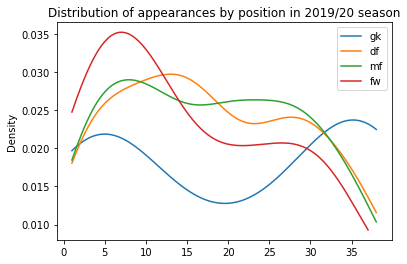

<Figure size 432x288 with 0 Axes>

In [38]:
data_1920 = {'gk': list(appearances_by_pos('gk', pos_id_1920,appear_1920).values()), 
        'df': list(appearances_by_pos('df', pos_id_1920, appear_1920).values()),
        'mf': list(appearances_by_pos('mf', pos_id_1920, appear_1920).values()),
        'fw': list(appearances_by_pos('fw', pos_id_1920, appear_1920).values())}

for key in data_1920:
    sns.kdeplot(data_1920[key], label=key, cut=0)

plt.legend()
plt.title("Distribution of appearances by position in 2019/20 season")
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'appearance_dist_by_pos_1920.png'))

#### Season 20/21

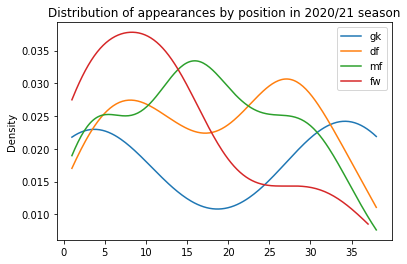

<Figure size 432x288 with 0 Axes>

In [39]:
_, pos_id_2021 = pos_id_and_id_pos(appear_2021, df_2021)

data_2021 = {'gk': list(appearances_by_pos('gk', pos_id_2021, appear_2021).values()), 
        'df': list(appearances_by_pos('df', pos_id_2021, appear_2021).values()),
        'mf': list(appearances_by_pos('mf', pos_id_2021, appear_2021).values()),
        'fw': list(appearances_by_pos('fw', pos_id_2021, appear_2021).values())}

for key in data_2021:
    sns.kdeplot(data_2021[key], label=key, cut=0)

plt.legend()
plt.title("Distribution of appearances by position in 2020/21 season")
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'appearance_dist_by_pos_2021.png'))

#### Season 21/22

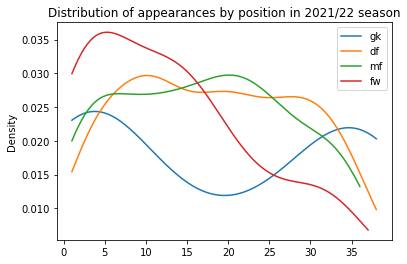

<Figure size 432x288 with 0 Axes>

In [40]:
_, pos_id_2122 = pos_id_and_id_pos(appear_2122, df_2122)

data_2122 = {'gk': list(appearances_by_pos('gk', pos_id_2122, appear_2122).values()), 
        'df': list(appearances_by_pos('df', pos_id_2122, appear_2122).values()),
        'mf': list(appearances_by_pos('mf', pos_id_2122, appear_2122).values()),
        'fw': list(appearances_by_pos('fw', pos_id_2122, appear_2122).values())}

for key in data_2122:
    sns.kdeplot(data_2122[key], label=key, cut=0)

plt.legend()
plt.title("Distribution of appearances by position in 2021/22 season")
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'appearance_dist_by_pos_2122.png'))

**NOTE:** It is clearly shown that goalkeepers tend to attend more matches than any other positions. Mostly, goalkeepers attend most of the club's matches throughout the seasons.

## Most common lineups

### All three seasons

In [88]:
# yield lineup from the df
df_lineups = df_id

df_lineups['num_df_home'] = (df_lineups.loc[: ,['home/df_0','home/df_1','home/df_2','home/df_3','home/df_4']] != -1.0).sum(axis=1)
df_lineups['num_df_away'] = (df_lineups.loc[: ,['away/df_0','away/df_1','away/df_2','away/df_3']] != -1.0).sum(axis=1)
df_lineups['num_mf_home'] = (df_lineups.loc[: ,['home/mf_0','home/mf_1','home/mf_2','home/mf_3','home/mf_4']] != -1.0).sum(axis=1)
df_lineups['num_mf_away'] = (df_lineups.loc[: ,['away/mf_0','away/mf_1','away/mf_2','away/mf_3','away/mf_4']] != -1.0).sum(axis=1)
df_lineups['num_fw_home'] = (df_lineups.loc[: ,['home/fw_0','home/fw_1','home/fw_2']] != -1.0).sum(axis=1)
df_lineups['num_fw_away'] = (df_lineups.loc[: ,['away/fw_0','away/fw_1','away/fw_2']] != -1.0).sum(axis=1)

# ['home/gk_0','home/df_0','home/df_1','home/df_2','home/df_3','home/df_4','home/mf_0','home/mf_1','home/mf_2','home/mf_3','home/mf_4','home/fw_0','home/fw_1','home/fw_2','away/gk_0','away/df_0','away/df_1','away/df_2','away/df_3','away/mf_0','away/mf_1','away/mf_2','away/mf_3','away/mf_4','away/fw_0','away/fw_1','away/fw_2']

df_lineups["home/lineup"] = df_lineups["num_df_home"].astype(str) + "-" + df_lineups["num_mf_home"].astype(str) + "-" + df_lineups["num_fw_home"].astype(str)
df_lineups["away/lineup"] = df_lineups["num_df_away"].astype(str) + "-" + df_lineups["num_mf_away"].astype(str) + "-" + df_lineups["num_fw_away"].astype(str)

In [66]:
print("Number of distinct lineups used by home teams: ", df_lineups['home/lineup'].nunique())
print("Number of distinct lineups used by away teams: ", df_lineups['away/lineup'].nunique())

Number of distinct lineups used by home teams:  7
Number of distinct lineups used by away teams:  7


In [70]:
print("Home lineups: ", df_lineups['home/lineup'].unique())
print("Away lineups: ", df_lineups['away/lineup'].unique())

Home lineups:  ['4-5-1' '4-4-2' '4-3-3' '3-4-3' '3-5-2' '5-4-1' '5-3-2']
Away lineups:  ['4-3-3' '4-5-1' '3-4-3' '3-5-2' '4-4-2' '4-4-1' '4-3-2']


In [67]:
print("Most common lineups used by home teams: ", df_lineups['home/lineup'].mode().values[0])
print("Most common lineups used by away teams: ", df_lineups['away/lineup'].mode().values[0])

Most common lineups used by home teams:  4-5-1
Most common lineups used by away teams:  4-5-1


In [177]:
# Get the count of each unique value in the 'home/lineup' column
home_counts = df_lineups['home/lineup'].value_counts().reset_index()

# Rename the columns for clarity
home_counts.columns = ['lineup', 'occurrences']

# Repeat the process for the 'away/lineup' column
away_counts = df_lineups['away/lineup'].value_counts().reset_index()
away_counts.columns = ['lineup', 'occurrences']

# Combine the two dataframes into one
lineups_occurence = pd.concat([home_counts, away_counts])

# Group the data by lineup and sum the occurrences
lineups_occurence = lineups_occurence.groupby('lineup').sum().reset_index()

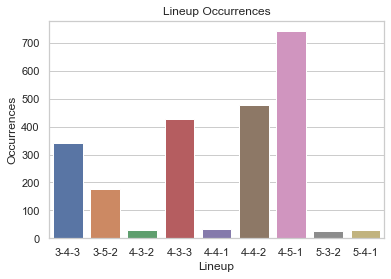

<Figure size 432x288 with 0 Axes>

In [180]:
# Plot the bar chart using seaborn
sns.barplot(x='lineup', y='occurrences', data=lineups_occurence)

# Add a title and labels to the plot
plt.title('Lineup Occurrences')
plt.xlabel('Lineup')
plt.ylabel('Occurrences')

# Show the plot
plt.show()
plt.savefig(os.path.join(VIS_PATH, "lineup_occurence.png"))

**NOTE:** It can be seen that teams prefer to play with a dense midfield. Also, it is also shown that midfielders play a vital role in the victory of a team. (shown in **Section 4**, file `02_exploratory_data_analysis.ipynb`

## Most effective lineups

### All three seasons

In [ ]:
# create a new dataframe to count the number of wins and losses for each lineup
df_counts = df_lineups.groupby(['home/lineup', 'home_result']).size().reset_index(name='counts')

# create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# plot the first pie chart
sns.pieplot(x='counts', y='home/lineup', data=df_counts[df_counts['home_result'] == 'win'], 
            labels=None, startangle=90, counterclock=False, autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Lineup distribution for home wins')
ax[0].set_xlabel('')

# plot the second pie chart
sns.pieplot(x='counts', y='home/lineup', data=df_counts[df_counts['home_result'] == 'lose'], 
            labels=None, startangle=90, counterclock=False, autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Lineup distribution for home losses')
ax[1].set_xlabel('')

sns.pieplot(x='counts', y='home/lineup', data=df_counts[df_counts['home_result'] == 'draw'], 
            labels=None, startangle=90, counterclock=False, autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Lineup distribution for home draws')
ax[1].set_xlabel('')

# show the plot
plt.show()


In [89]:
df_lineups['away_result'] = np.where(df_lineups['home_result'] == 'win', 'lose',
                             np.where(df_lineups['home_result'] == 'lose', 'win', 'draw'))

In [111]:
print(df_lineups.loc[:, ['home/lineup', 'home_result', 'away/lineup', 'away_result']].head(10))

  home/lineup home_result away/lineup away_result
0       4-5-1        lose       4-3-3         win
1       4-4-2         win       4-5-1        lose
2       4-3-3         win       4-5-1        lose
3       4-4-2         win       3-4-3        lose
4       4-5-1         win       4-5-1        lose
5       4-5-1        draw       3-5-2        draw
6       3-4-3        draw       3-5-2        draw
7       4-4-2        lose       3-4-3         win
8       4-4-2        draw       4-5-1        draw
9       3-5-2        lose       4-5-1         win


In [116]:
print(list(set(['4-5-1', '4-4-2', '4-3-3', '3-4-3', '3-5-2', '5-4-1', '5-3-2','4-3-3', '4-5-1', '3-4-3', '3-5-2', '4-4-2', '4-4-1', '4-3-2'])))

['4-3-2', '5-3-2', '5-4-1', '3-4-3', '3-5-2', '4-4-1', '4-4-2', '4-3-3', '4-5-1']


In [134]:
#df_loss_count
#df_wins_count
#df_draw_count
results = ['win', 'lose', 'draw']
lineups = ['4-3-2', '5-3-2', '5-4-1', '3-4-3', '3-5-2', '4-4-1', '4-4-2', '4-3-3', '4-5-1']

# create win_df, counting the number of matches win by each lineup
win_counts = {lineup: 0 for lineup in lineups}

for index, row in df_lineups.iterrows():
    if row['home_result'] == 'win':
        win_counts[row['home/lineup']] += 1
    elif row['away_result'] == 'win':
        win_counts[row['away/lineup']] += 1

win_df = pd.DataFrame({'lineup': list(win_counts.keys()), 'count': list(win_counts.values())})

# create lose_df
lose_counts = {lineup: 0 for lineup in lineups}

for index, row in df_lineups.iterrows():
    if row['home_result'] == 'lose':
        lose_counts[row['home/lineup']] += 1
    elif row['away_result'] == 'lose':
        lose_counts[row['away/lineup']] += 1

lose_df = pd.DataFrame({'lineup': list(lose_counts.keys()), 'count': list(lose_counts.values())})


# create draw_df
draw_counts = {lineup: 0 for lineup in lineups}

for index, row in df_lineups.iterrows():
    if row['home_result'] == 'draw':
        draw_counts[row['home/lineup']] += 1
    elif row['away_result'] == 'draw':
        draw_counts[row['away/lineup']] += 1

draw_df = pd.DataFrame({'lineup': list(draw_counts.keys()), 'count': list(draw_counts.values())})


In [142]:
# outer join the three dataframes above
lineup_result = pd.merge(win_df, lose_df, on='lineup', how='outer')
lineup_result = pd.merge(lineup_result, draw_df, on='lineup', how='outer')
lineup_result = lineup_result.fillna(0)
lineup_result = lineup_result.rename(columns={'count_x': 'win', 'count_y': 'loss', 'count':'draw'})

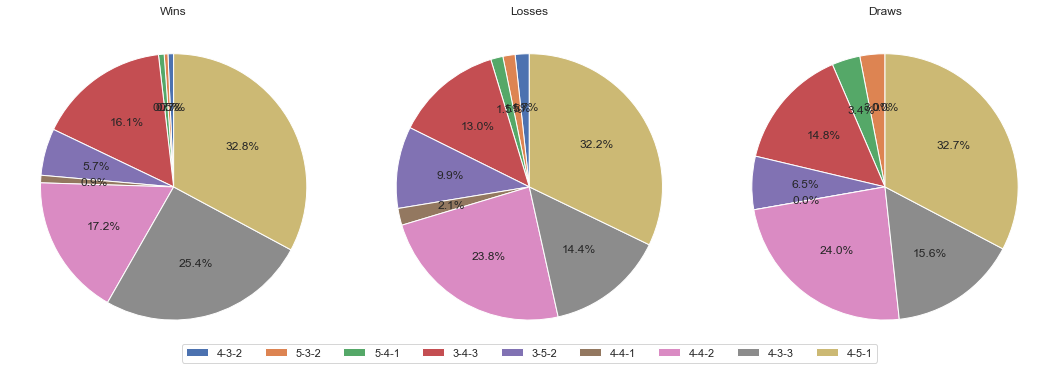

<Figure size 432x288 with 0 Axes>

In [172]:
# Calculate total wins, losses, and draws
total_wins = lineup_result['win'].sum()
total_losses = lineup_result['loss'].sum()
total_draws = lineup_result['draw'].sum()

# Create pie charts for wins, losses, and draws
sizes_wins = lineup_result['win'] / total_wins
sizes_losses = lineup_result['loss'] / total_losses
sizes_draws = lineup_result['draw'] / total_draws

# Plot the pie charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(sizes_wins, labels=['' for i in range(len(lineup_result))], startangle=90, autopct='%1.1f%%')
axs[0].set_title("Wins")

axs[1].pie(sizes_losses, labels=['' for i in range(len(lineup_result))], startangle=90, autopct='%1.1f%%')
axs[1].set_title("Losses")

axs[2].pie(sizes_draws, labels=['' for i in range(len(lineup_result))], startangle=90, autopct='%1.1f%%')
axs[2].set_title("Draws")

plt.tight_layout()

# Create the legend
fig.legend(lineup_result['lineup'], loc='lower center', ncol=len(lineup_result))
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'pie_chart_for_lineup_and_result.png'))

**NOTE:** It can be seen that the `4-5-1` lineup accounts for the highest portion in the total number of victories.